# Import Library


In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Data Preprocessing


In [147]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [148]:
# rename the column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah",
                        "Luas Bangunan (m2)": "Luas Bangunan",
                        "Harga Penawaran (dari Owner)": "Harga Penawaran",
                        "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah" })
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [149]:
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


# Exploratory Data Analysis


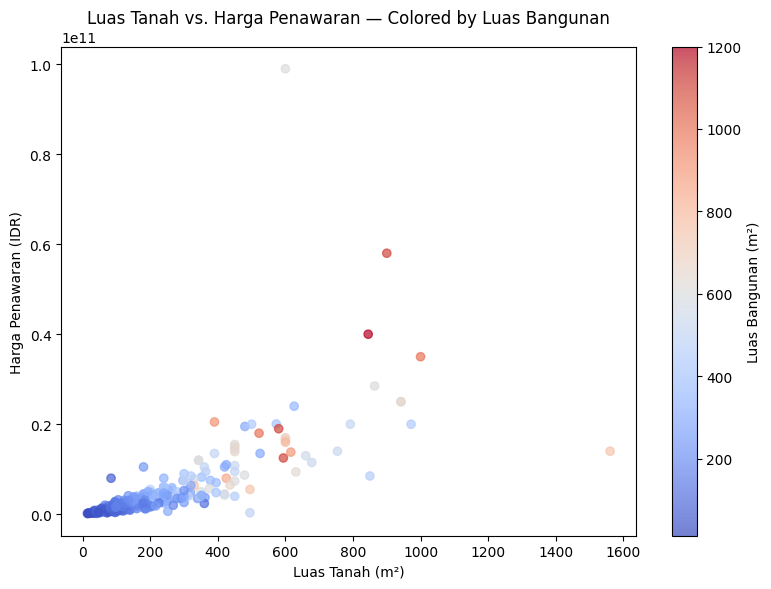

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['Luas Tanah'],
    df['Harga Penawaran'],
    c=df['Luas Bangunan'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(label='Luas Bangunan (m²)')
plt.title('Luas Tanah vs. Harga Penawaran — Colored by Luas Bangunan')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.tight_layout()
plt.show()


The scatter plot shows the relationship between Luas Tanah (land size) and Harga Penawaran (offered price), with colors representing Luas Bangunan (building size). From the graph, we can see that properties with larger land areas usually have higher prices. The warm-colored points (red and orange) show houses with bigger building sizes, which are mostly in the higher price range. Meanwhile, the blue-colored points represent smaller houses that are generally cheaper and located toward the lower left of the chart.

This means that both land area and building size have a strong influence on property prices. Bigger houses on larger lands tend to be more expensive, while smaller ones are more affordable. However, there are a few points that don’t follow this trend — these could be special houses located in popular or premium areas. Overall, the chart helps us understand that property value increases with size, and it clearly shows different groups of properties from affordable to luxury.

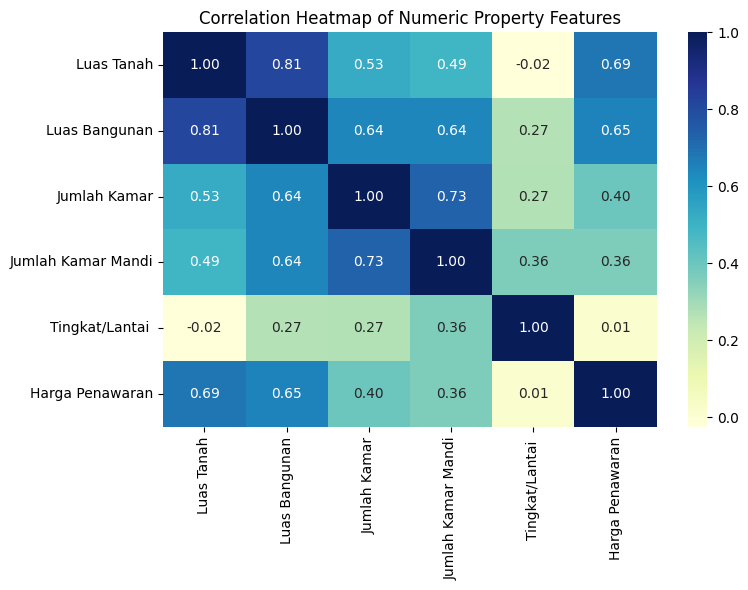

In [152]:
import seaborn as sns
plt.figure(figsize=(8,6))

corr = df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar',
                 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
                 'Harga Penawaran']].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Property Features')
plt.tight_layout()
plt.show()


This heatmap shows the correlation between different numeric property features, such as land area, building area, number of rooms, and offered price. From the visualization, we can see that Luas Tanah (land area) and Luas Bangunan (building area) have a very strong positive correlation of 0.81, meaning that bigger land usually comes with bigger buildings. Both land and building area are also strongly related to Harga Penawaran (offered price), with correlations of 0.69 and 0.65. This means that as the size of the land or building increases, the property price also tends to increase.

On the other hand, the Tingkat/Lantai (number of floors) has almost no correlation with the other features, especially with price (0.01), which means that the number of floors does not significantly affect property value in this dataset. Jumlah Kamar (number of rooms) and Jumlah Kamar Mandi (number of bathrooms) are moderately correlated with each other (0.73) and with price, showing that larger houses with more rooms usually have higher prices. Overall, this heatmap helps us understand that land size, building size, and room counts are the most important factors affecting property prices.

# Data Preparation for Clustering

In [153]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_encoded = df.copy()

categorical_cols = ['Area Category', 'Nama Daerah', 'Terjual/Belum',
                    'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']

le = LabelEncoder()

for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


df_encoded.head()


,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0


In [154]:
# Create a StandardScaler object
sc = StandardScaler()

# Make a safe copy
df_scaled = df.copy()

# Fit and transform the selected numeric columns
scaled_values = sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan',
                                     'Jumlah Kamar', 'Jumlah Kamar Mandi',
                                     'Tingkat/Lantai ', 'Harga Penawaran']])

# Convert scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_values,
                         columns=['Luas Tanah', 'Luas Bangunan',
                                  'Jumlah Kamar', 'Jumlah Kamar Mandi',
                                  'Tingkat/Lantai ', 'Harga Penawaran'])

# Preview
df_scaled.head()


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [155]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


#Silhouette Score

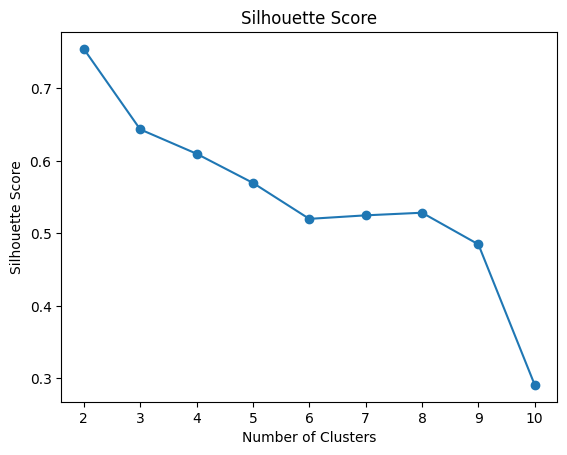

In [156]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


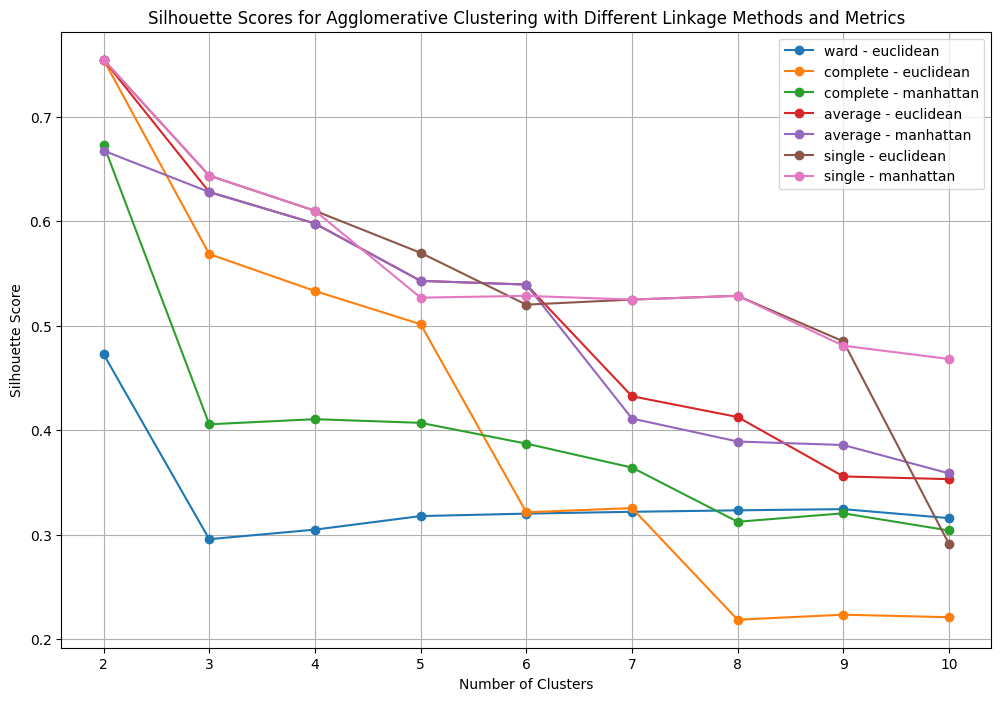

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [157]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# Dendogram Visualization

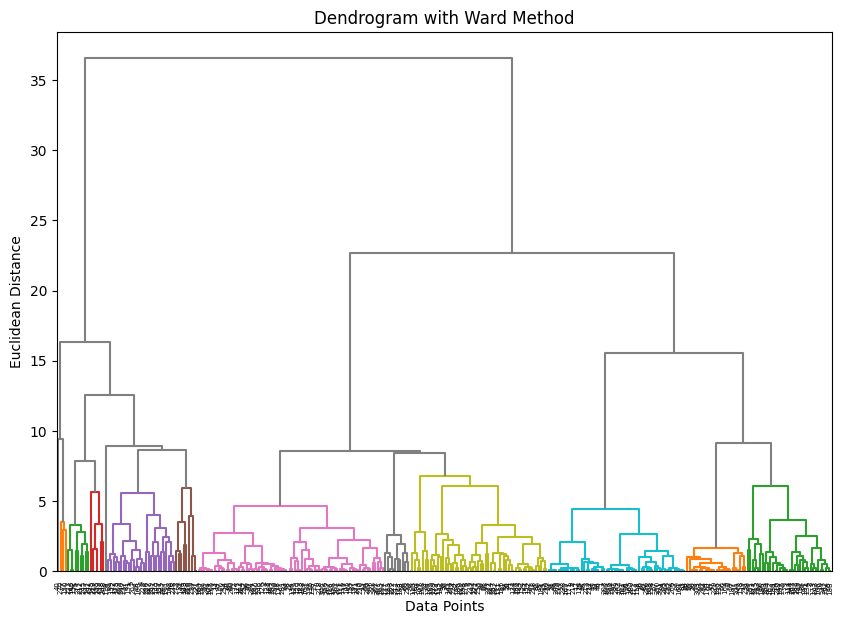

In [158]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

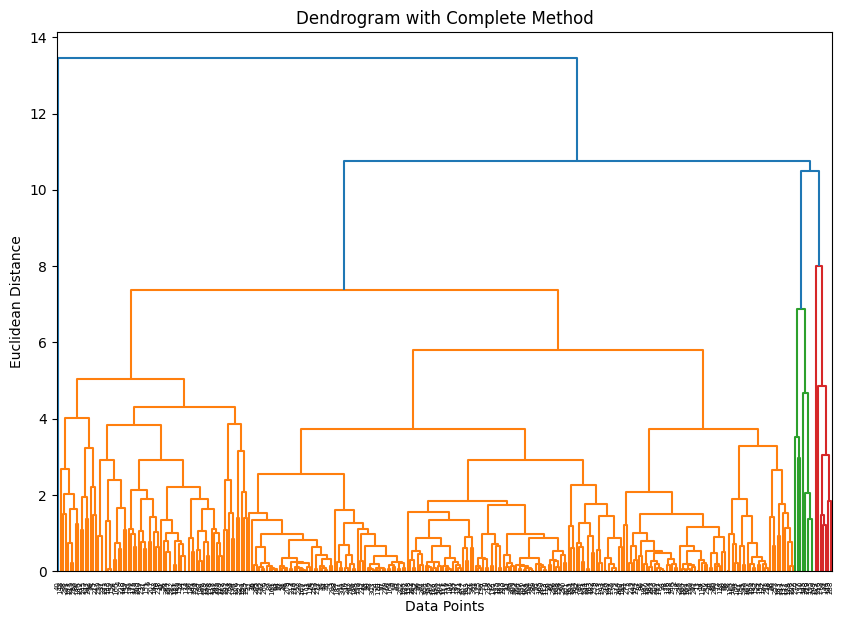

In [159]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

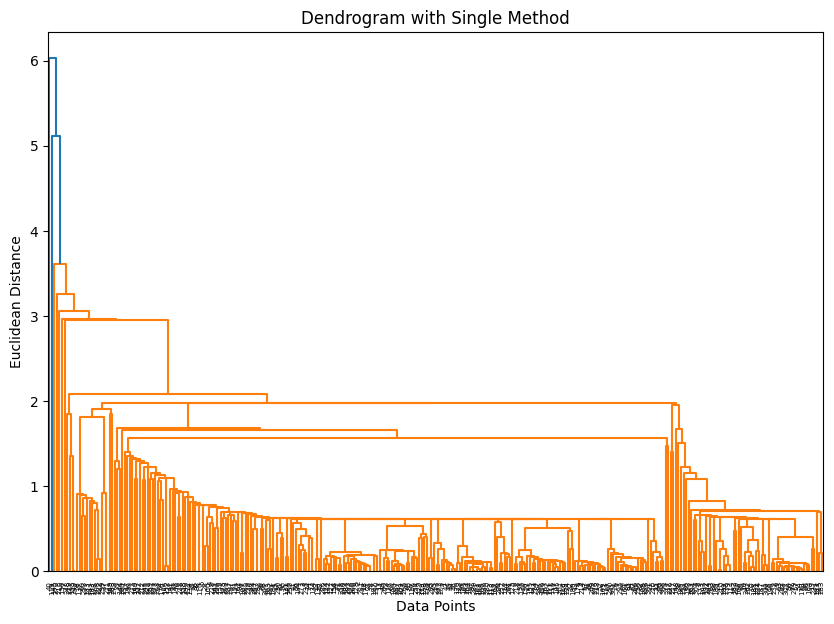

In [160]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

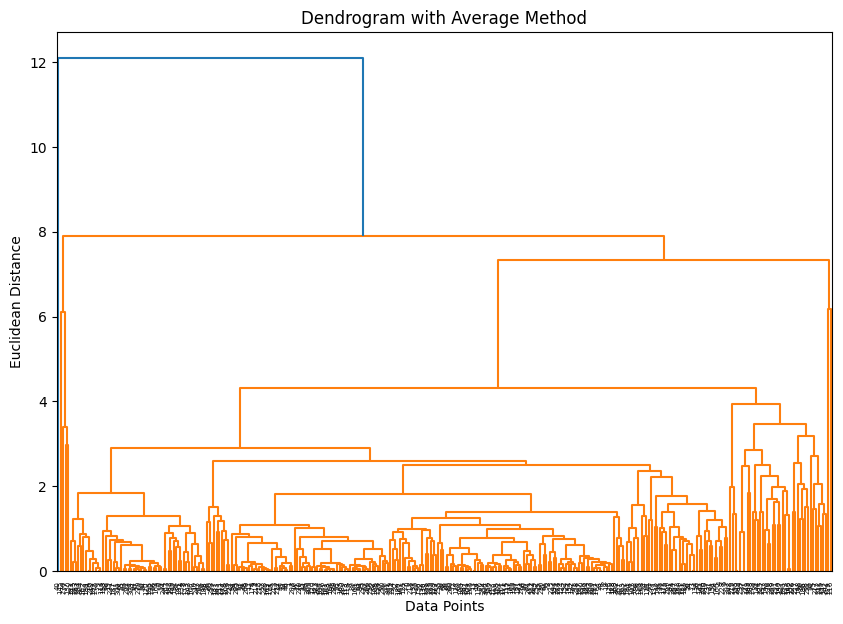

In [161]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Hierarchical Clustering Modeling Best


In [162]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [163]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


# Hierarchical Clustering Modeling Ward


In [164]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(df_scaled)

In [165]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.4727464054343294


## Dendogram Visualization for Hierarchical Clustering Model

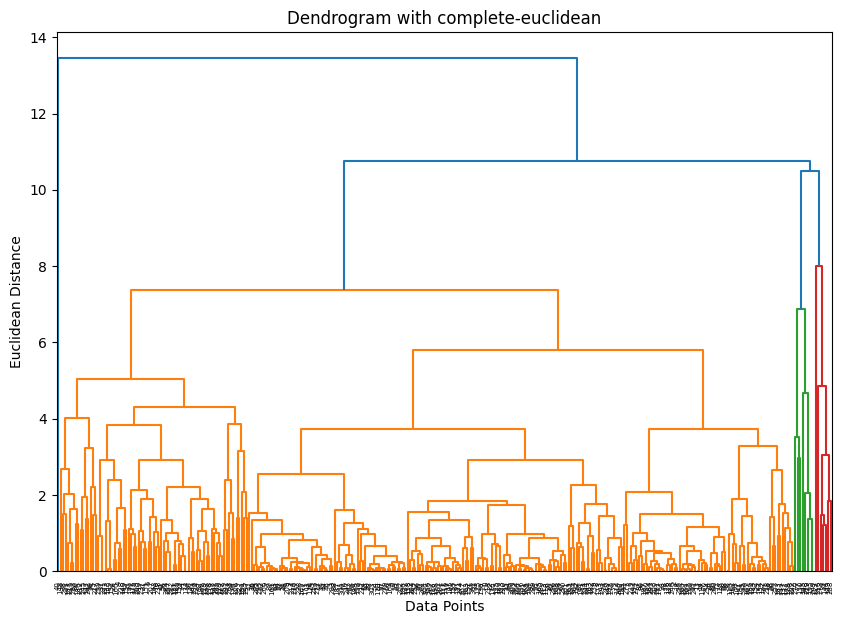

In [166]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Merge With Original data

In [167]:
# Add the cluster labels to the original data
df_encoded['Agglo'] = y_hc

# Analyze the clusters with the original values
df_encoded.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,3,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1,0
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,1


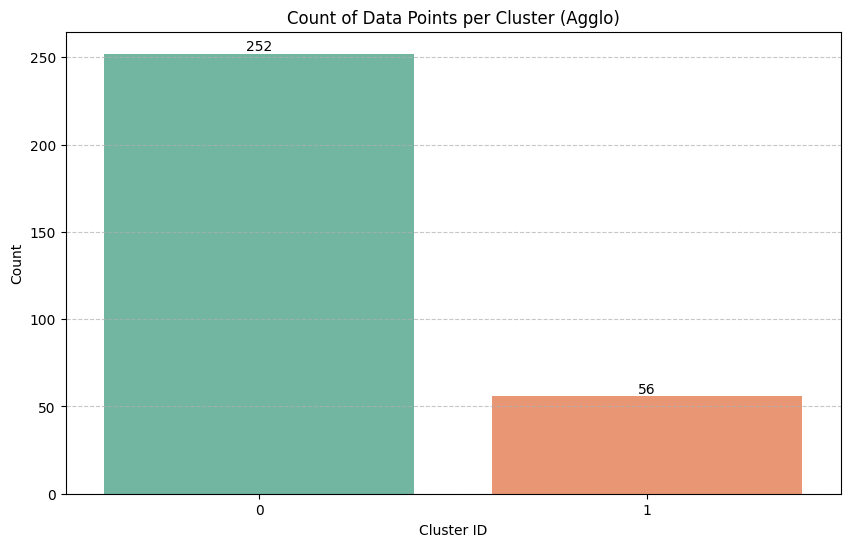

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_encoded['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

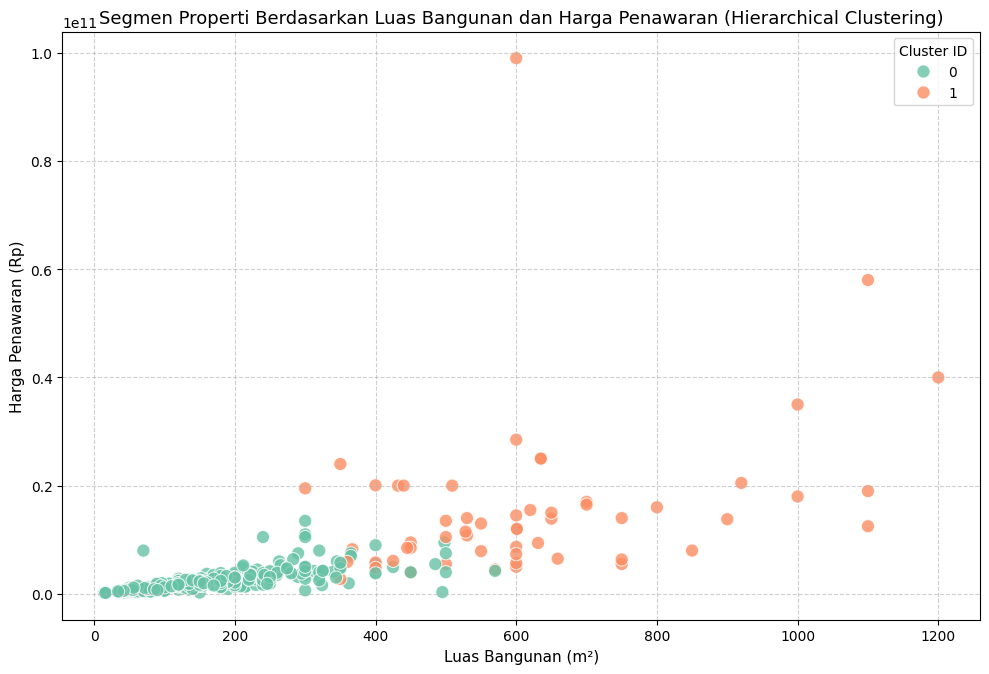

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is df_encoded and you have cluster labels in y_hc (or y_kmeans)
df_viz = df.copy()
df_viz['Cluster'] = y_hc  # or y_kmeans if you used K-Means

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_viz,
    x='Luas Bangunan',
    y='Harga Penawaran',
    hue='Cluster',
    palette='Set2',
    s=90,
    alpha=0.8
)

plt.title('Segmen Properti Berdasarkan Luas Bangunan dan Harga Penawaran (Hierarchical Clustering)', fontsize=13)
plt.xlabel('Luas Bangunan (m²)', fontsize=11)
plt.ylabel('Harga Penawaran (Rp)', fontsize=11)
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [170]:
import plotly.express as px

# Make sure your DataFrame has the cluster labels
df_3d = df.copy()
df_3d['Cluster'] = y_hc  # or y_kmeans, depending on which model you used

# Define 3D axes
x_col = 'Luas Bangunan'
y_col = 'Harga Penawaran'
z_col = 'Jumlah Kamar'

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_3d,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df_3d['Cluster'].astype(str),  # ensure discrete colors per cluster
    size='Luas Tanah',  # optional: make larger plots for bigger land area
    hover_data=['Area Category', 'Terjual/Belum'],  # show details when hovering
    title='3D Visualization of Property Clusters by Size, Price, and Rooms',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Beautify the layout
fig.update_traces(marker=dict(opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis_title='Luas Bangunan (m²)',
        yaxis_title='Harga Penawaran (Rp)',
        zaxis_title='Jumlah Kamar'
    ),
    legend_title='Cluster ID'
)

fig.show()


#Statistical Summary for each cluster

In [173]:
# Show all columns and rows when displaying the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Group the data by cluster (assuming y_hc contains your cluster labels)
cluster_summary = df_encoded.copy()
cluster_summary['Cluster'] = y_hc  # or y_kmeans if you used K-Means

# Compute summary statistics for each numerical column
cluster_summary = cluster_summary.groupby('Cluster').agg({
    'Luas Tanah': ['mean', 'std', 'min', 'max', 'median'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max', 'median'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max', 'median'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max', 'median'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max', 'median']
})

# Rename the axis for clarity
cluster_summary = cluster_summary.rename_axis('Cluster')

# Round for neatness
cluster_summary = cluster_summary.round(2)

# Display result
display(cluster_summary)


Luas Tanah                           Luas Bangunan                     \
              mean     std  min   max median          mean     std  min   max   
Cluster                                                                         
0           155.86   93.27   14   525  135.5        187.90  106.84   14   570   
1           546.88  245.54  240  1561  464.5        621.21  212.41  300  1200   

               Jumlah Kamar                      Jumlah Kamar Mandi            \
        median         mean   std min max median               mean   std min   
Cluster                                                                         
0        170.0         3.85  1.34   1   9    4.0               2.91  1.25   1   
1        600.0         6.18  1.54   3  13    6.0               5.25  1.77   2   

                   Tingkat/Lantai                       Harga Penawaran  \
        max median            mean   std min max median            mean   
Cluster                                                                   
0         7    3.0            1.81  0.48   1   3    2.0    2.628531e+09   
1        13    5.0            1.98  0.59   1   4    2.0    1.575027e+10   

                                                              
                  std         min          max        median  
Cluster                                                       
0        2.046885e+09   160000000  13500000000  2.100000e+09  
1        1.493437e+10  2750000000  99000000000  1.275000e+10

# Comparison & Interpretation

# Cluster 0 — Small & Affordable Houses
#Cluster Profile


*  Cluster 0 represents properties characterized by small to medium land and
building sizes, averaging around 155.86 m² for land and 187.90 m² for building area. These houses typically feature three to four bedrooms and two to three bathrooms, with one to three floors, making them practical for small to mid-sized families. The average price is approximately 2.6 billion IDR, positioning this group as part of the affordable housing segment. These houses are usually found in suburban or developing areas where the cost of land is lower, allowing developers to offer more competitive prices. The overall design emphasizes functionality, efficiency, and comfort, making this cluster ideal for young families, first-time homebuyers, or early-career professionals who seek affordable yet livable housing options.

#Managerial Implications


*   From a managerial perspective, this cluster requires a marketing strategy focused on middle-income buyers. Companies should target young families and first-time homeowners by promoting affordability and practicality as the main selling points. Marketing efforts should prioritize mass-market property platforms such as Rumah123, 99.co, and OLX Properti, where most cost-conscious buyers search for listings. Visual promotion using virtual tours, simple 3D renderings, and realistic photos can help increase buyer interest and trust. In terms of financing, management should establish strategic partnerships with banks and financial institutions to provide attractive KPR (mortgage) packages or installment plans that make home ownership easier.


*   Product-wise, developers should focus on building compact but efficient home designs with sufficient access to essential facilities such as schools, hospitals, and public transport. Management must also emphasize energy-efficient materials and low maintenance costs to strengthen the value proposition. In monitoring performance, the key performance indicators (KPIs) should include the lead conversion rate, property viewing frequency, and monthly sales volume, as these metrics will reflect how well the affordable housing segment is reaching its intended audience.

#Business Implications

*   For the business as a whole, properties in Cluster 0 represent a stable revenue stream due to their high market demand and faster sales turnover. Although the profit margin per unit may be smaller compared to luxury properties, the higher transaction volume can lead to significant cumulative profit. These affordable houses are also more resilient to economic fluctuations, as middle-income buyers remain active even during uncertain market conditions. Consequently, this segment provides a steady and reliable income base for the company.


*   Moreover, focusing on this cluster allows the company to build a strong brand image as a developer that supports affordable housing initiatives, aligning with government programs and social responsibility efforts. Operationally, management should prioritize cost efficiency, bulk purchasing of materials, and streamlined construction processes to maintain competitive pricing while preserving quality. Over time, the company can leverage its position in this market to expand into new housing projects or develop mixed-use areas catering to mid-level consumers.
# Cluster 1 — Large & Premium Properties
#Cluster Profile


*   Cluster 1 includes properties that belong to the luxury and high-end housing market, characterized by significantly larger land areas averaging 546.88 m² and building areas around 621.21 m². These houses generally feature six bedrooms and five bathrooms, with two to four floors, reflecting a spacious, elegant, and premium architectural design. The average selling price of around 15.7 billion IDR indicates exclusivity and targets upper-class buyers or investors. The homes in this cluster are typically situated in prestigious neighborhoods, offering privacy, high-end amenities, and sophisticated aesthetics. Such properties often attract executives, entrepreneurs, expatriates, or investors who value comfort, status, and investment potential.

#Managerial Implications


*   In managing this cluster, a specialized marketing and branding approach is necessary. The management should focus on exclusive property marketing channels, such as Rumah.com Elite, Sotheby’s Realty, and private investor listings, which cater specifically to high-net-worth clients. Visual presentation is essential; therefore, professional photography, drone shots, architectural renders, and virtual video tours should be used to showcase each property’s unique features. Managers should also consider holding exclusive events such as private viewings, wine-and-dine experiences, or investment consultations to appeal to this market segment.
*  The company should maintain close collaboration with luxury real estate agents, interior designers, architects, and investment consultants to enhance the property’s perceived value. Providing personalized customer service, including one-on-one consultations and tailored property recommendations, can strengthen client relationships. Management must monitor KPIs such as closing rate, average deal size, marketing ROI, and client satisfaction, as these metrics better reflect performance in the premium property sector. A dedicated sales team trained in high-end negotiation and luxury customer handling is also recommended to maximize conversions.

#Business Implications


*   From a business standpoint, Cluster 1 offers high profit margins per transaction, despite having fewer overall sales. This segment plays a vital role in improving the company’s brand equity, positioning it as a reputable developer capable of delivering luxury and innovation. While marketing and maintenance costs are higher, the return per sale is substantial. However, this market is more sensitive to economic conditions and buyer sentiment, requiring careful timing and sustained relationship management.
*   Entering and maintaining presence in the luxury segment strengthens the company’s portfolio diversification, balancing the affordability-focused strategy from Cluster 0. It also allows developers to showcase design excellence, premium materials, and sustainable innovation, which can attract both investors and high-profile clients. In the long term, consistent performance in this segment can enhance international credibility and open opportunities for joint ventures with foreign property investors.


# Overall Recommendations


*   In summary, Cluster 0 serves as the foundation for steady revenue and mass-market engagement, while Cluster 1 enhances brand prestige and profitability. Managers should adopt dual marketing strategies: mass-oriented promotions emphasizing affordability and practicality for Cluster 0, and personalized, luxury-oriented approaches for Cluster 1. Product development and promotional efforts must align with the distinct motivations of each target market. Regular evaluation of clustering results every six months is recommended to track changes in buyer behavior, ensuring the company’s marketing and development strategies remain relevant and data-driven.
*   By combining both clusters strategically, the company can achieve balanced growth, catering to both the middle-income mass market and the premium investment market, ensuring financial stability, stronger brand identity, and long-term competitiveness.